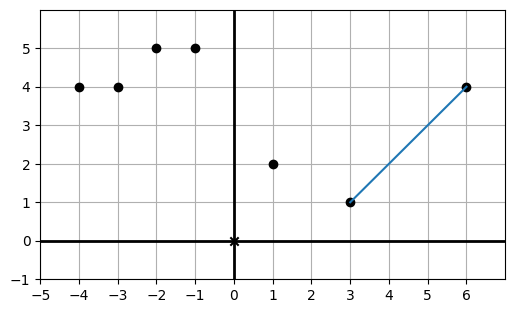

In [3]:
from vector_drawing import *

dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4)]
draw(Points(*dino_vectors), Segment((6, 4), (3, 1)))

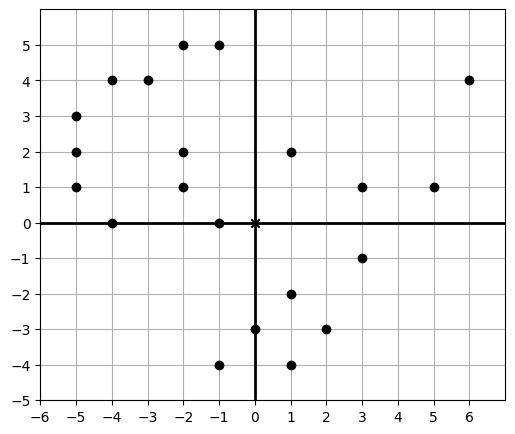

In [11]:
# Exercise 2.3
from vector_drawing import *

dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

draw(Points(*dino_vectors))

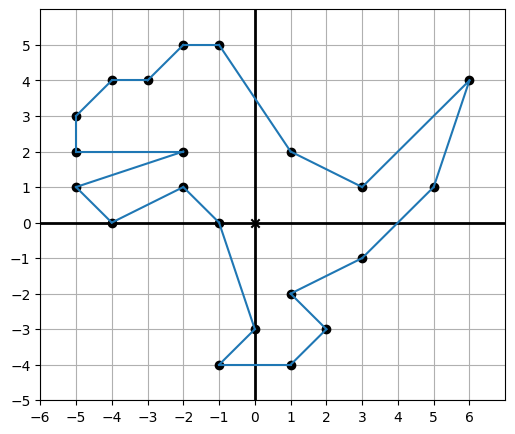

In [ ]:
# Exercise 2.4
import vector_drawing

vector_drawing.draw(Points(*dino_vectors), Polygon(*dino_vectors))

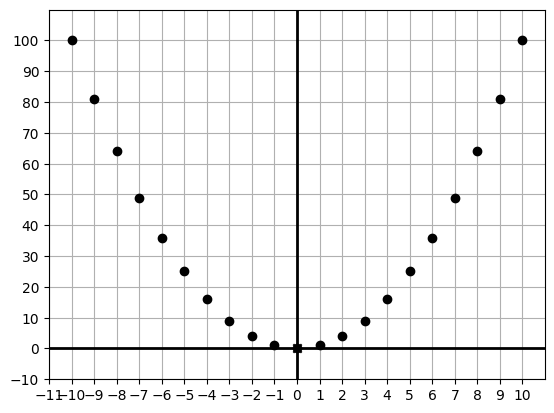

In [ ]:
# Exercise 2.5
from vector_drawing import draw, Points, Polygon

x_range = range(-10, 11)
x2 = [(x, x**2) for x in x_range]

draw(Points(*x2), grid=(1, 10), nice_aspect_ratio=False)

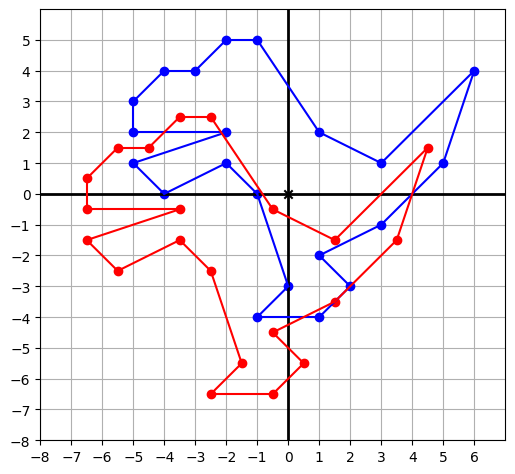

In [12]:
from vector_drawing import draw, Points, Polygon


def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])


dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]

draw(
    Points(*dino_vectors, color="blue"),
    Polygon(*dino_vectors, color="blue"),
    Points(*dino_vectors2, color="red"),
    Polygon(*dino_vectors2, color="red"),
)

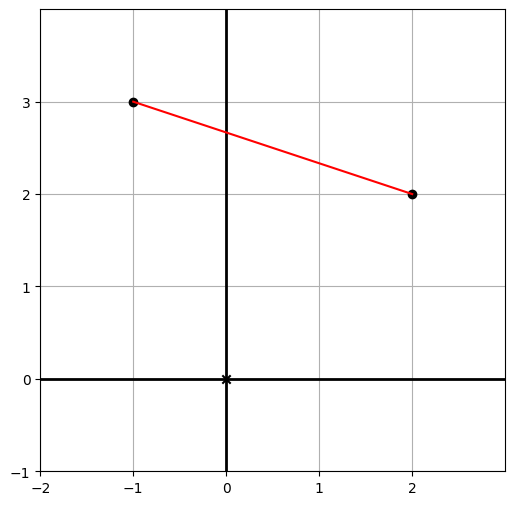

In [6]:
from vector_drawing import draw, Points, Segment

draw(
    Points(
        (2, 2),
        (-1, 3),
    ),
    Segment((2, 2), (-1, 3), color="red"),
)

In [13]:
# Exercise 2.7


def new_add(*vectors) -> tuple:
    """
    向量列表合
    """
    return (sum([v[0] for v in vectors]), sum(v[1] for v in vectors))


def translate(translation, vectors):
    """向量平移"""
    return [new_add(translation, v) for v in vectors]


vectors = [(1, 2), (3, 4), (1, 2), (-2, 4)]

# new_add(*vectors)
translate((2, 3), vectors)

[(3, 5), (5, 7), (3, 5), (0, 7)]

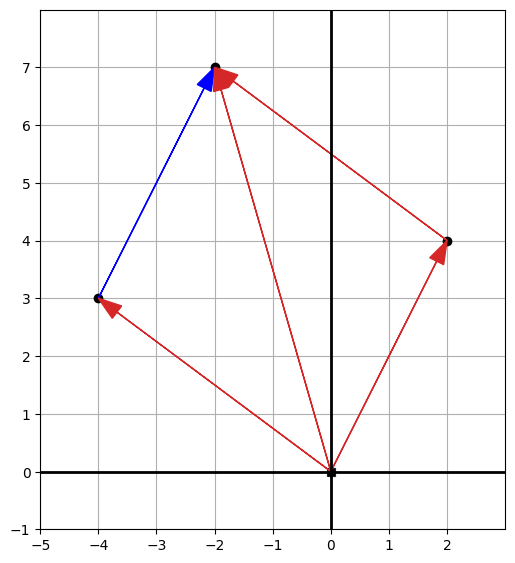

In [25]:
from vector_drawing import draw, Points, Arrow

v1 = (2, 4)
v2 = (-4, 3)
v = new_add(v1, v2)
# v1 + v2
draw(
    Points(v1, v2, v, (0, 0)),
    Arrow(v, v1),
    Arrow(v, v2, color="blue"),
    Arrow(v1, (0, 0)),
    Arrow(v2, (0, 0)),
    Arrow(v, (0, 0)),
)

In [22]:
# Exercise 2.11
from vector_drawing import Polygon, draw

dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

width = max(v[0] for v in dino_vectors) - min([v[0] for v in dino_vectors])
height = max(v[1] for v in dino_vectors) - min([v[1] for v in dino_vectors])
translations = [(x * width, y * height) for x in range(-5, 5) for y in range(-5, 5)]
new_dino_list = [
    Polygon(*translate(translation, dino_vectors)) for translation in translations
]
draw(*new_dino_list, grid=False, axes=False, origin=False)

NameError: name 'translate' is not defined

In [40]:
from math import sqrt


def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)


max(dino_vectors, key=length)

(6, 4)

In [4]:
from math import pi, sqrt


def scale(s: int | float, v):
    return (v[0] * s, v[1] * s)


scale(pi, (sqrt(2), sqrt(3)))

(4.442882938158366, 5.441398092702653)

In [2]:
# Exercise 2.18
from math import sqrt


def scale_with_scalar(vector, scalar: int | float):
    return sqrt((vector[0] * scalar) ** 2 + (vector[1] * scalar) ** 2) == scalar * sqrt(
        vector[0] ** 2 + vector[1] ** 2
    )


scale_with_scalar((1, 2), 2)

True

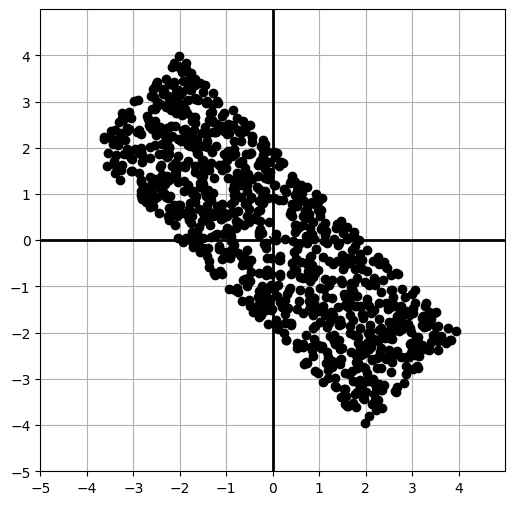

In [16]:
from vector_drawing import draw, Points
from random import uniform

z = (-1, 1)
v = (1, 1)


def random_r():
    return uniform(-3, 3)


def random_s():
    return uniform(-1, 1)


possibilities = [add(scale(random_r(), z), scale(random_s(), v)) for i in range(1000)]

draw(Points(*possibilities))

In [18]:
# Exercise 2.24


def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])


subtract((1, 2), (2, 3))

(-1, -1)

In [24]:
from vector_function import length, subtract


def distance(v1, v2):
    return length(subtract(v1, v2))


def perimeter(vectors):
    distances = [
        distance(vectors[i], vectors[(i + 1) % len(vectors)])
        for i in range(0, len(vectors))
    ]
    return sum(distances)


perimeter(dino_vectors)

44.77115093694564

In [31]:
possibilities = [(n, m) for m in range(0, 14) for n in range(m + 1, 14)]
result = [v for v in possibilities if distance((1, -1), v) == 13]
result

[(-4, -13), (6, -13), (13, -6), (13, 4)]

In [4]:
from math import tan, pi

tan(45)
tan(pi / 4)

from math import sin, cos


def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length * cos(angle), length * sin(angle))


angle = 37 * pi / 180
to_cartesian((5, angle))

(3.993177550236464, 3.0090751157602416)

In [9]:
from math import asin, sin, sqrt, acos, atan2

sin(1)
asin(sin(1))

asin(3 / sqrt(13))

acos(-2 / sqrt(13))

atan2(3, -2)

2.158798930342464

In [8]:
from vector_function import length
from math import atan2


def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)


to_polar((1, 0))
to_polar((-2, 3))

NameError: name 'atan2' is not defined

In [18]:
# Exercise 2.27

length((-1.34, 2.68))

2.9963310898497184

In [20]:
# Exercise 2.35

from math import tan, pi

tan(116.57 / 180 * pi)

-1.9995682083189976

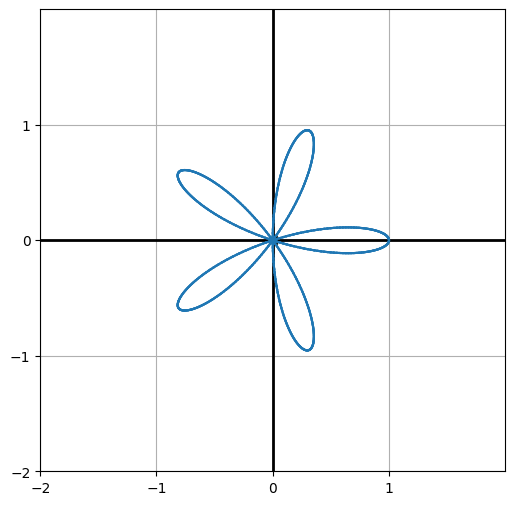

In [23]:
# Exercise 2.37

from math import cos, pi
from vector_drawing import draw, Polygon

polar_coords = [(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0, 1000)]
vectors = [to_cartesian(p) for p in polar_coords]

draw(Polygon(*vectors))

In [47]:
# Exercise 2.38

from math import tan, pi
from vector_function import length

v = (-2, 3)

l = length(v)

_, r = to_polar(v)

for i in range(int(pi * 501), int(pi * 1000)):
    t = i / 1000
    if abs(tan(t) - tan(r)) < 0.001:
        print(t)
        break

2.159


In [66]:
# Exercise 2.41
from vector_drawing import Points, Polygon, draw
from vector_function import subtract, length

dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# draw(Points(*dino_vectors), Polygon(*dino_vectors))

mouth = [(-5, 2), (-2, 2), (-5, 1)]
toe = [(0, -3), (-1, -4), (1, -4)]
tail = [(3, 1), (6, 4), (5, 1)]

t1 = to_polar(subtract(mouth[1], mouth[2]))[1]
t2 = to_polar(subtract(toe[0], toe[1]))[1]
t3 = to_polar(subtract(tail[1], tail[2]))[1] - to_polar(subtract(tail[1], tail[0]))[1]
print(t1 * 180 / pi, t2 * 180 / pi, t3 * 180 / pi)

18.43494882292201 45.0 26.56505117707799


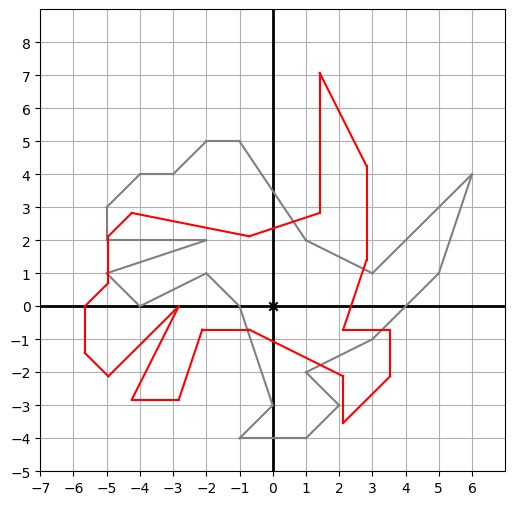

In [68]:
"""旋转恐龙"""

from math import pi

rotation_angle = pi / 4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l, angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]
draw(Polygon(*dino_vectors, color="gray"), Polygon(*dino_rotated, color="red"))

In [4]:
from math import pi


def rotate(vectors, rotation_angle: float):
    """旋转向量列表"""
    # 笛卡尔坐标
    polars = [to_polar(v) for v in vectors]
    rotated = [(p[0], p[1] + rotation_angle) for p in polars]
    return [to_cartesian(r) for r in rotated]


draw(Polygon(*rotate(dino_vectors, pi / 4)))

NameError: name 'pi' is not defined

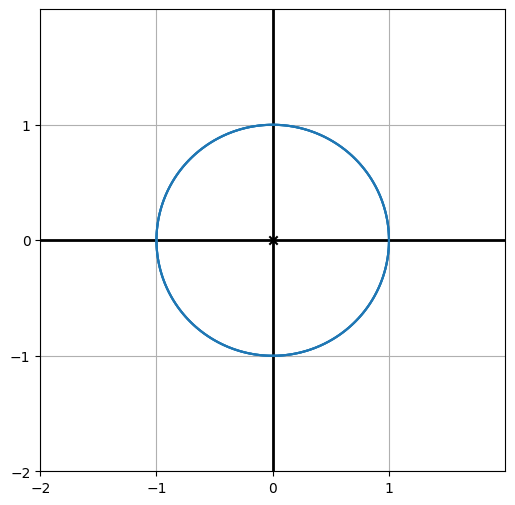

In [90]:
# Exercise 2.43
from math import pi


def regular_polygon(n, l):
    """返回规则 N 边形"""
    if n < 3:
        print("多边形必须多于3")
        return
    angle = 2 * pi / n
    vectors = [(l, 0)]
    for _ in range(n - 1):
        vectors.append(rotate([vectors[len(vectors) - 1]], angle)[0])

    return vectors


def regular_polygonBook(n):
    return [to_cartesian((1, 2 * pi * k / n)) for k in range(0, n)]


draw(Polygon(*regular_polygonBook(800)))

In [7]:
# Exercise 2.44
from vector_function import translate as tr
from vector_drawing import draw, Polygon
from math import pi

dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]
draw(Polygon(*rotate(tr((8, 8), dino_vectors), -5 / 3 * pi)))

NameError: name 'to_polar' is not defined